In [1]:
#Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Reading the data
data = pd.read_csv('data_to_show.csv')
data

,Unnamed: 0,x1,y
0,0,118.806042,235.460634
1,1,77.906308,195.656912
2,2,109.102973,193.948473
3,3,122.763420,230.122876
4,4,70.846286,152.185975
...,...,...,...
2995,2995,213.947800,98.670263
2996,2996,202.772492,135.100387
2997,2997,199.465292,126.359718
2998,2998,210.940939,69.183450


In [3]:
#Reshaping the input data
x = np.array(data['x1']).reshape(-1, 1)
x

array([[118.80604232],
       [ 77.90630756],
       [109.10297272],
       ...,
       [199.46529238],
       [210.94093883],
       [178.23960213]])

In [4]:
#Reshaping the input data
y = np.array(data['y']).reshape(-1, 1)
y

array([[235.46063376],
       [195.65691216],
       [193.94847252],
       ...,
       [126.35971799],
       [ 69.18344971],
       [ 78.40079625]])

In [5]:
#Fitting a linear regression model over the data
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x, y)
predicted = lin_reg.predict(x)
predicted

array([[171.50382331],
       [198.11022536],
       [177.81593689],
       ...,
       [119.03276333],
       [111.56753979],
       [132.84065846]])

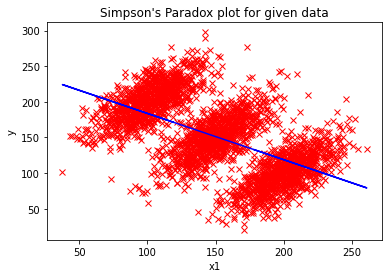

In [6]:
#Plotting the actual datapoints and the prediction results of the linear model
plt.plot(x, y, 'rx')
plt.plot(x, predicted, 'b-')
plt.xlabel('x1')
plt.ylabel('y')
plt.title("Simpson's Paradox plot for given data")
plt.show()

**Generating synthetic data that can show Simpson's paradox**

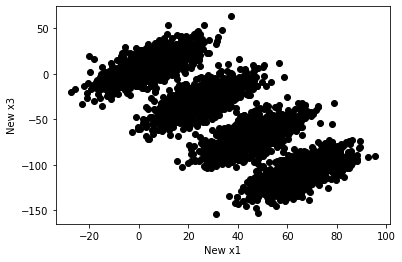

In [7]:
#Generating new data
final_x1 = []
final_x3 = []

#The whole process for generating normal clusters is done 4 times to make 4 data clusters
#2 variables are taken to show linear clusters of data because for only 2 variable, there will be a line for a linear function
for i in range(4):
    #Generating 1000 different normally distributed values for x1 and x2
    x1 = np.random.normal(5, 10, 1000)
    x2 = np.random.normal(5, 10, 1000)
    #Generating a new constant for every new cluster
    constant = np.random.normal(1)
    x3 = []
    for j in range(len(x1)):
        #Appending the values of x3 which is given by the equation x3 = x1 + x2 + constant term
        #Here, I am adding and subtracting the ith multiple of a certain number (20 and 40 respectively)
        #This is to show the progression and descent in the cluster patters as needed to depict the Simpson's Paradox.
        final_x1.append(x1[j] + (20*i))
        final_x3.append(x1[j] + x2[j] + constant - (40*i))


#Plotting the data
plt.plot(final_x1, final_x3, 'ko')
plt.xlabel('New x1')
plt.ylabel('New x3')
plt.show()        

In [8]:
#Reshaping the input data
X = np.array(final_x1).reshape(-1, 1)
X

array([[17.23895378],
       [-3.97553313],
       [ 8.04623191],
       ...,
       [75.24728014],
       [77.57209296],
       [77.65062671]])

In [9]:
#Reshaping the input data
Y = np.array(final_x3).reshape(-1, 1)
Y

array([[  29.96003893],
       [   6.10036981],
       [  -4.5161107 ],
       ...,
       [-113.57223278],
       [-100.51465065],
       [ -91.6150773 ]])

In [10]:
#Fitting a linear regression model over the data
from sklearn.linear_model import LinearRegression
new_lin_reg = LinearRegression()
new_lin_reg.fit(X, Y)
new_predicted = new_lin_reg.predict(X)
new_predicted

array([[ -22.40647293],
       [   9.58732824],
       [  -8.54282791],
       ...,
       [-109.88946826],
       [-113.39554406],
       [-113.51398166]])

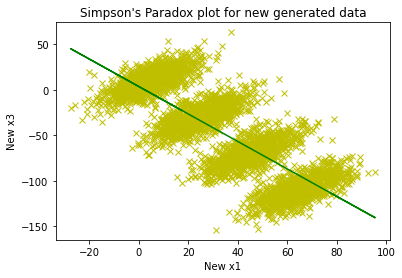

In [11]:
#Plotting the actual datapoints and the prediction results of the linear model
plt.plot(X, Y, 'yx')
plt.plot(X, new_predicted, 'g-')
plt.xlabel('New x1')
plt.ylabel('New x3')
plt.title("Simpson's Paradox plot for new generated data")
plt.show()